모듈화하기

Boston price 예측모델
- 데이터셋 : boston.csv
- 학습종류: 지도학습 / 회귀
- 알고리즘 : Ridge, Lasso, Elastine
- 피처: 모두.
- 타겟: medv   

In [50]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증\
from sklearn.linear_model import Ridge, Lasso, ElasticNet                                                        

In [51]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)
houseDict = {x:[] for x in col}
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)


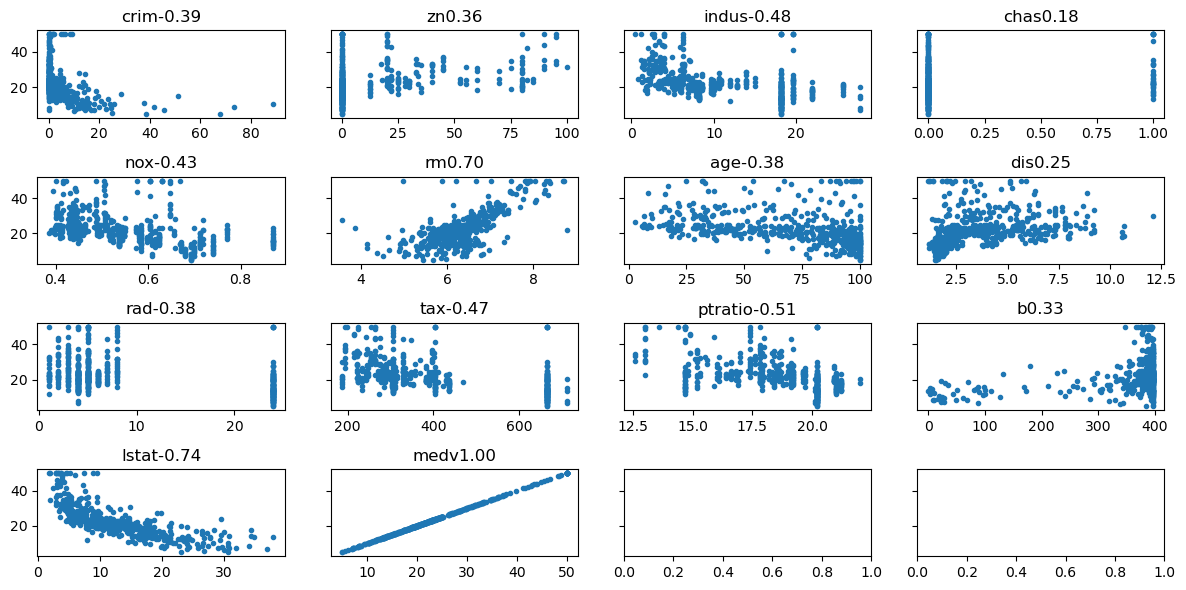

In [52]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


In [53]:
nowDF = houDF.copy()

In [54]:
# from sklearn.preprocessing import MinMaxScaler
# #값의 범위가 다르므로 정규화
# array = nowDF[nowDF.columns[:-1]].to_numpy()
# minmax = MinMaxScaler()
# narr = minmax.fit_transform(array)
# nowDF[nowDF.columns[:-1]] = pd.DataFrame(narr)

In [55]:
from sklearn.preprocessing import StandardScaler
array = nowDF[nowDF.columns[:-1]].to_numpy()
scaler = StandardScaler()
nowDF[nowDF.columns[:-1]] = scaler.fit_transform(array)



In [56]:
# featureDF = nowDF[nowDF.columns[:-1]]
# targetSR = nowDF['medv']

# print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")
# ## 학습용 : 테스트용 = 9:1
# X_train, X_test, y_train, y_test = train_test_split(featureDF,
#                                                     targetSR,
#                                                     random_state=5)
# print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
# print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")

In [57]:
# nowDF.columns[:-1]
alphaList = [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3, 5, 10, 50, 100]
def ft_choice(columns, type, alphaList=alphaList):
    print(columns)
    featureDF = nowDF[columns]
    targetSR = nowDF['medv']

    # print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")
    ## 학습용 : 테스트용 = 9:1
    X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                        targetSR,
                                                        random_state=5)
    # print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
    # print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")
    return RLE(type, alphaList,X_train, X_test, y_train, y_test)

In [58]:
#aglt = Ridge(alpha), Lasso(alpha), ElasticNet()
#alphaList = [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3]

def RLE(type, alphaList,X_train, X_test, y_train, y_test):
    resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score','diff', 'train_loss', 'test_loss', 'coef'])
    kf = KFold()
    ## alpha값에 따른 Ridge 모델 성능 비교
    for alpha in alphaList:
        if type == 'rid':
            # print('Ridge')
            lr = Ridge(alpha)
        elif type == 'las':
            # print('Lasso')
            lr = Lasso(alpha,max_iter=5000, tol=1e-10)
        elif type == 'ela':
            # print('ElasticNet')
            lr = ElasticNet(alpha)
                        
        
        train_stotal , test_stotal = 0, 0
        train_ltotal, test_ltotal = 0, 0
        
            
        for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
            # print(f"Fold {i}")
        # print(test_index in y_test.index)
            ## 학습용 / 테스트용 피쳐와 타겟 추출
            train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
            test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
            # print(train_data.columns)

            #학습
            lr.fit(train_data, train_label)
            
            train_score = lr.score(train_data, train_label)
            test_score = lr.score(test_data, test_label)

            train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
            test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

            coef = lr.coef_
            
            train_stotal += train_score
            test_stotal += test_score
            train_ltotal += train_loss
            test_ltotal += test_loss
        #alpha값 별로 성능과 손실값 평균 저장하기    
        resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5, coef.round(4)]
    
    print(resultDF)
    fives(resultDF, type)

In [59]:
def fives(resultDF, title='None'):
    fig, axe = plt.subplots(1,5, figsize=(12,6), sharex=True)
    axe = axe.flatten()
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 5, 24)]
    for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
        ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
        ax.legend()

    fig.suptitle(title)


Index(['zn', 'indus'], dtype='object')
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.238192    0.219892  0.018301    8.041441   8.075550   
0.5      0.5     0.238192    0.219924  0.018267    8.041444   8.075494   
1.0      1.0     0.238189    0.219964  0.018226    8.041455   8.075431   
1.5      1.5     0.238186    0.220002  0.018184    8.041473   8.075375   
2.0      2.0     0.238181    0.220038  0.018143    8.041499   8.075327   
2.5      2.5     0.238175    0.220073  0.018102    8.041531   8.075285   
3.0      3.0     0.238168    0.220106  0.018062    8.041570   8.075251   
5.0      5.0     0.238125    0.220224  0.017901    8.041795   8.075181   
10.0    10.0     0.237934    0.220421  0.017512    8.042809   8.075463   
50.0    50.0     0.233150    0.218176  0.014973    8.068103   8.095176   
100.0  100.0     0.222822    0.210027  0.012795    8.122424   8.143451   

            coef  
0.1    [-4.1776]  
0.5     [-4.172]  
1.0     [-4.165

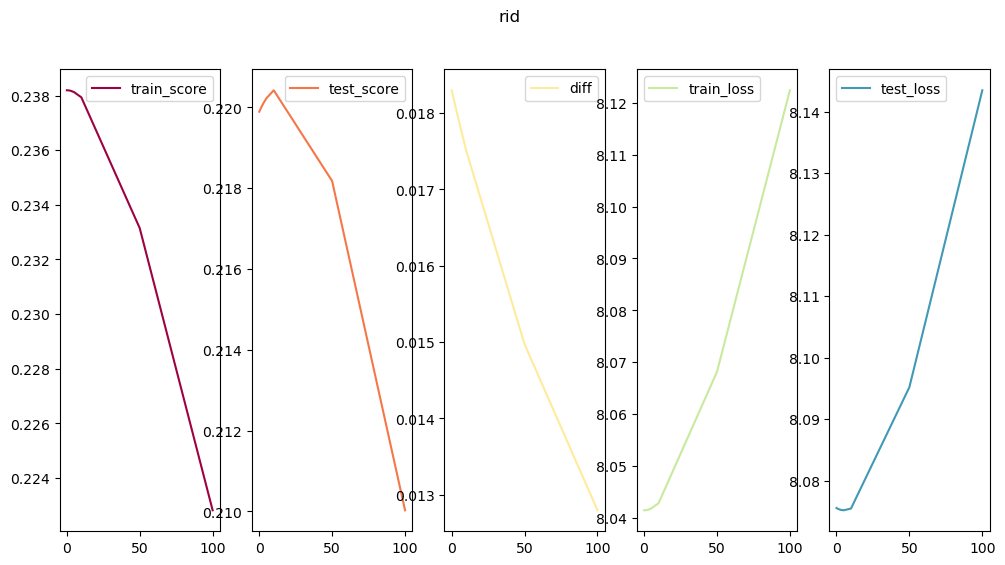

In [60]:
ft_choice(nowDF.columns[1:3],'rid')

Index(['rm', 'lstat'], dtype='object')
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.555541    0.537647  0.017894    6.141530   6.207133   
0.5      0.5     0.555540    0.537693  0.017847    6.141540   6.206941   
1.0      1.0     0.555535    0.537747  0.017788    6.141572   6.206721   
1.5      1.5     0.555528    0.537798  0.017730    6.141623   6.206522   
2.0      2.0     0.555517    0.537845  0.017672    6.141696   6.206344   
2.5      2.5     0.555504    0.537889  0.017615    6.141788   6.206187   
3.0      3.0     0.555488    0.537930  0.017558    6.141901   6.206052   
5.0      5.0     0.555394    0.538061  0.017333    6.142547   6.205714   
10.0    10.0     0.554971    0.538175  0.016796    6.145469   6.206239   
50.0    50.0     0.544349    0.530870  0.013479    6.218385   6.263008   
100.0  100.0     0.521236    0.510309  0.010927    6.374177   6.404822   

            coef  
0.1    [-6.9917]  
0.5    [-6.9817]  
1.0    [-6.9691

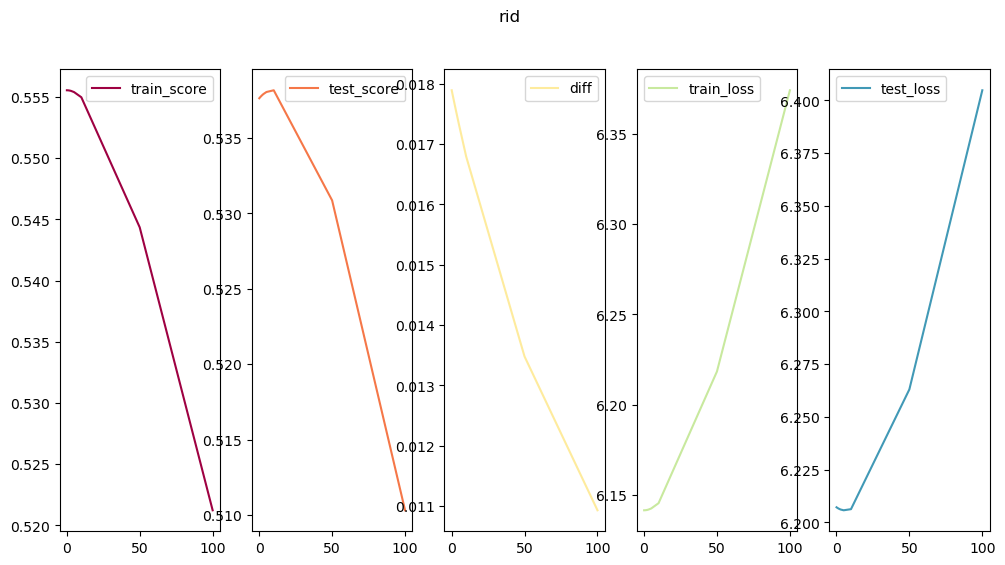

In [61]:
ft_choice(nowDF.columns[5:13:7],'rid')

['crim', 'zn']
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.142728    0.125844  0.016884    8.530153   8.548803   
0.5      0.5     0.139801    0.124037  0.015763    8.544675   8.561680   
1.0      1.0     0.130653    0.115830  0.014823    8.589897   8.607060   
1.5      1.5     0.115406    0.101012  0.014394    8.664738   8.684432   
2.0      2.0     0.094061    0.079584  0.014477    8.768433   8.792797   
2.5      2.5     0.066617    0.051545  0.015072    8.899964   8.930786   
3.0      3.0     0.033259    0.017155  0.016105    9.057281   9.095459   
5.0      5.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
10.0    10.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9.214612   9.194466   

           coef  
0.1    [3.0994]  
0.5    [2.6702]  
1.0    [2.1337]  
1.5    [1.5971]  
2.0   

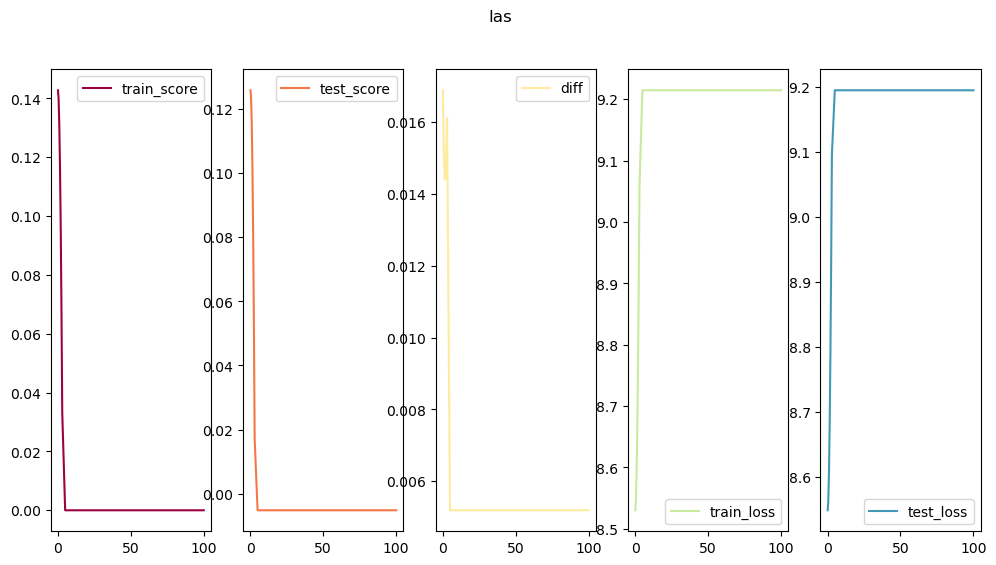

In [62]:
ft_choice(['crim','zn'],'las')

['rm', 'lstat']
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.555423    0.537951  0.017472    6.142346   6.206315   
0.5      0.5     0.552583    0.536761  0.015821    6.161912   6.218968   
1.0      1.0     0.543707    0.529761  0.013946    6.222656   6.270969   
1.5      1.5     0.528913    0.516634  0.012279    6.322590   6.362488   
2.0      2.0     0.508203    0.497381  0.010822    6.459886   6.492112   
2.5      2.5     0.481575    0.472001  0.009573    6.632211   6.657820   
3.0      3.0     0.449029    0.440495  0.008534    6.836906   6.857132   
5.0      5.0     0.259675    0.253209  0.006466    7.923303   7.934280   
10.0    10.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9.214612   9.194466   

            coef  
0.1    [-6.8847]  
0.5    [-6.4464]  
1.0    [-5.8985]  
1.5    [-5.3506]  


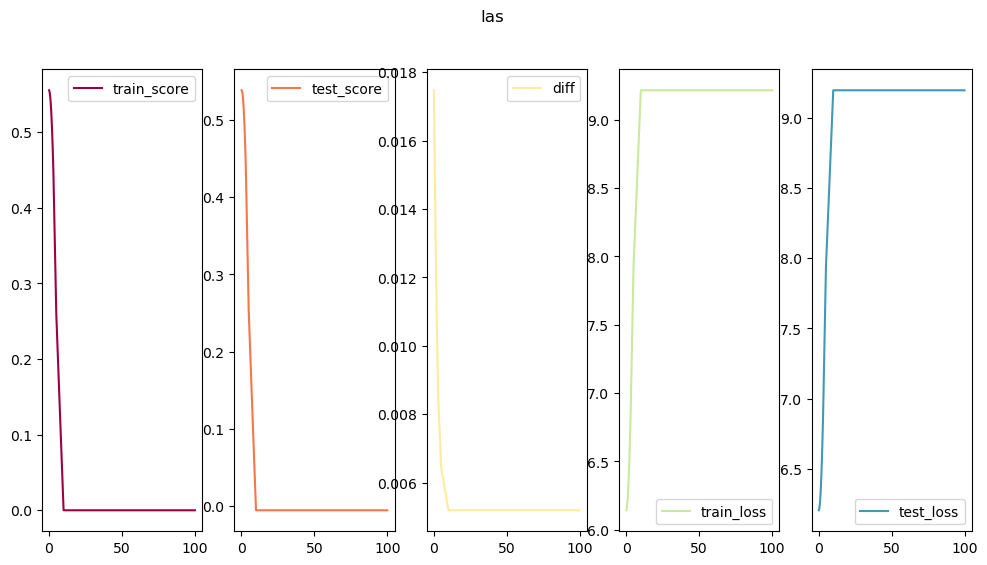

In [63]:
ft_choice(['rm','lstat'],'las')

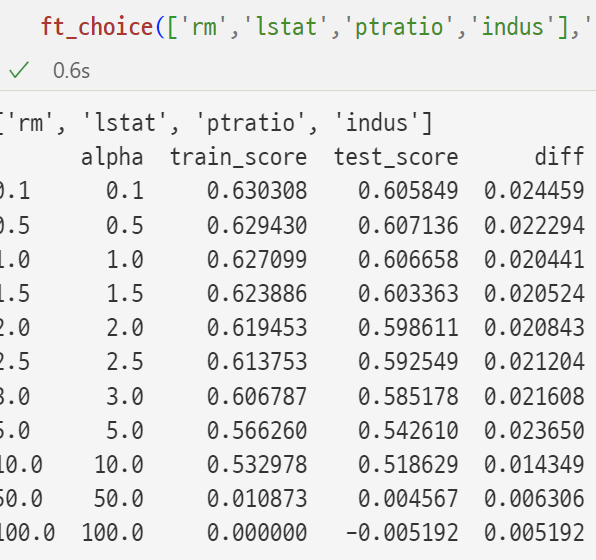

['rm', 'lstat', 'ptratio', 'indus']
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.629826    0.608828  0.020998    5.604896   5.711765   
0.5      0.5     0.625238    0.609218  0.016020    5.639573   5.715964   
1.0      1.0     0.612262    0.599348  0.012914    5.736305   5.793773   
1.5      1.5     0.590984    0.579305  0.011679    5.891506   5.941830   
2.0      2.0     0.561194    0.550450  0.010745    6.102135   6.145698   
2.5      2.5     0.522893    0.512783  0.010110    6.362672   6.400313   
3.0      3.0     0.476081    0.466304  0.009776    6.667257   6.700107   
5.0      5.0     0.259675    0.253209  0.006466    7.923303   7.934280   
10.0    10.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9.214612   9.194466   

                             coef  
0.1    [-5.8737, -2.3845, 0.0788]  
0.5

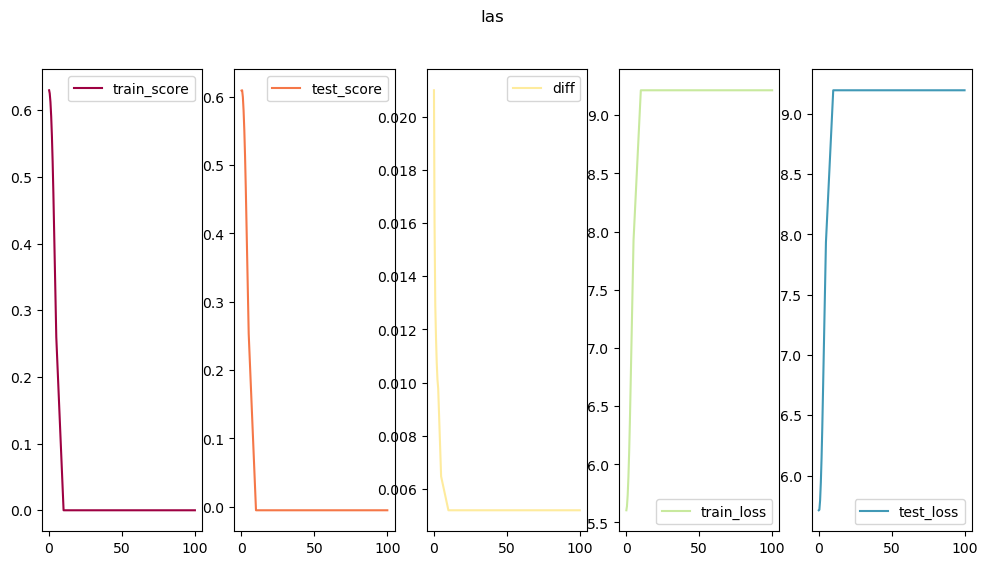

In [64]:
ft_choice(['rm','lstat','ptratio','indus'],'las')

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.737667    0.697264  0.040403    4.718555   5.029498   
0.5      0.5     0.705500    0.679469  0.026031    4.999819   5.187357   
1.0      1.0     0.677973    0.660500  0.017473    5.228298   5.345902   
1.5      1.5     0.646874    0.636280  0.010593    5.474980   5.536372   
2.0      2.0     0.613801    0.603823  0.009978    5.725578   5.779661   
2.5      2.5     0.571420    0.561296  0.010124    6.031418   6.082287   
3.0      3.0     0.519621    0.508931  0.010690    6.385284   6.434516   
5.0      5.0     0.269922    0.258415  0.011507    7.869593   7.905443   
10.0    10.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9

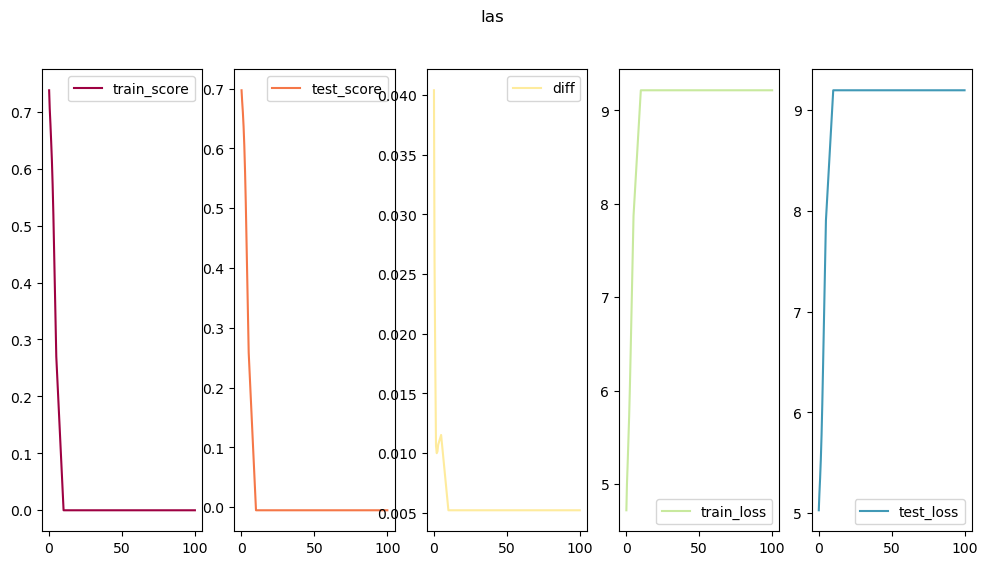

In [65]:
ft_choice(nowDF.columns[:-1],'las')

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.742961    0.700591  0.042370    4.670750   4.997161   
0.5      0.5     0.742955    0.700841  0.042113    4.670811   4.995303   
1.0      1.0     0.742935    0.701132  0.041803    4.670993   4.993148   
1.5      1.5     0.742903    0.701400  0.041503    4.671280   4.991164   
2.0      2.0     0.742861    0.701648  0.041213    4.671661   4.989336   
2.5      2.5     0.742810    0.701877  0.040933    4.672126   4.987650   
3.0      3.0     0.742751    0.702090  0.040661    4.672666   4.986094   
5.0      5.0     0.742446    0.702796  0.039650    4.675440   4.980987   
10.0    10.0     0.741376    0.703847  0.037529    4.685158   4.973775   
50.0    50.0     0.728907    0.700308  0.028599    4.796880   5.010136   
100.0  100.0     0.711110    0.687531  0.023579    4

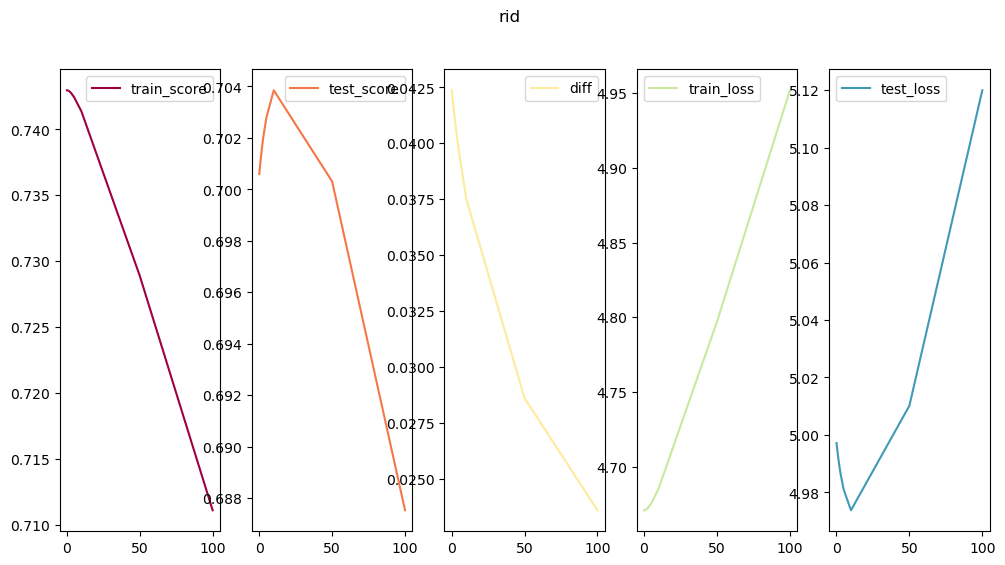

In [66]:
ft_choice(nowDF.columns[:-1],'rid')

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.737085    0.701496  0.035589    4.723880   4.996065   
0.5      0.5     0.701834    0.676257  0.025577    5.030730   5.214898   
1.0      1.0     0.657104    0.636615  0.020489    5.395166   5.530238   
1.5      1.5     0.614751    0.598698  0.016054    5.718626   5.815294   
2.0      2.0     0.570396    0.557516  0.012880    6.038796   6.109156   
2.5      2.5     0.525668    0.515226  0.010442    6.345325   6.396299   
3.0      3.0     0.481825    0.473380  0.008445    6.632216   6.667368   
5.0      5.0     0.324565    0.319261  0.005305    7.572108   7.578497   
10.0    10.0     0.070465    0.065210  0.005255    8.883249   8.870813   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9

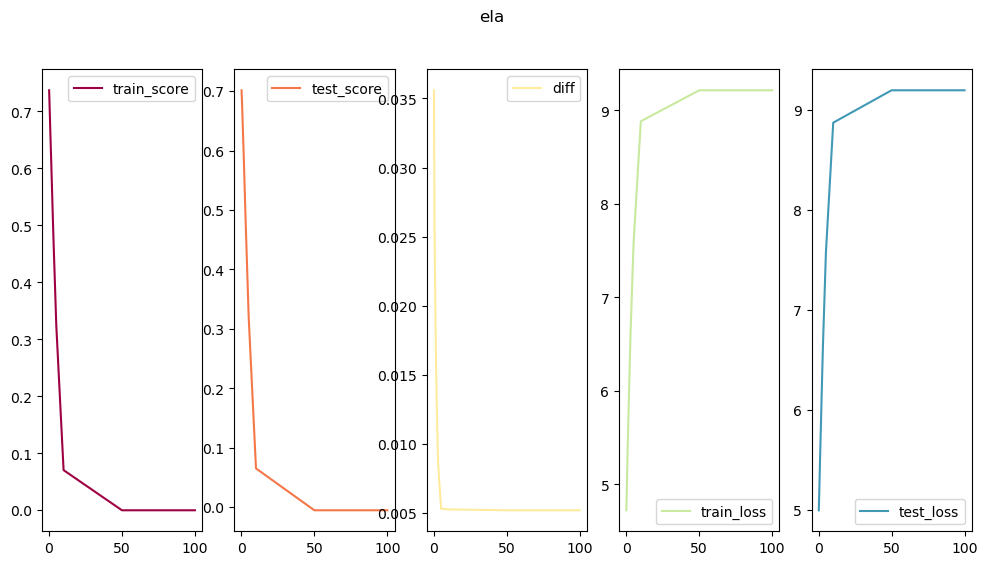

In [67]:
ft_choice(nowDF.columns[:-1],'ela')

['rm', 'lstat', 'ptratio', 'indus', 'tax']
       alpha  train_score  test_score      diff  train_loss  test_loss  \
0.1      0.1     0.628258    0.607668  0.020590    5.616791   5.723828   
0.5      0.5     0.603164    0.588114  0.015050    5.803367   5.876602   
1.0      1.0     0.560169    0.549225  0.010944    6.109785   6.155065   
1.5      1.5     0.515900    0.507102  0.008798    6.409989   6.440495   
2.0      2.0     0.472744    0.465194  0.007550    6.689703   6.711298   
2.5      2.5     0.431382    0.424581  0.006801    6.947233   6.962934   
3.0      3.0     0.392065    0.385710  0.006355    7.183478   7.194991   
5.0      5.0     0.255599    0.249598  0.006001    7.949172   7.951544   
10.0    10.0     0.049278    0.043843  0.005435    8.983856   8.970093   
50.0    50.0     0.000000   -0.005192  0.005192    9.214612   9.194466   
100.0  100.0     0.000000   -0.005192  0.005192    9.214612   9.194466   

                                       coef  
0.1            [-5.565

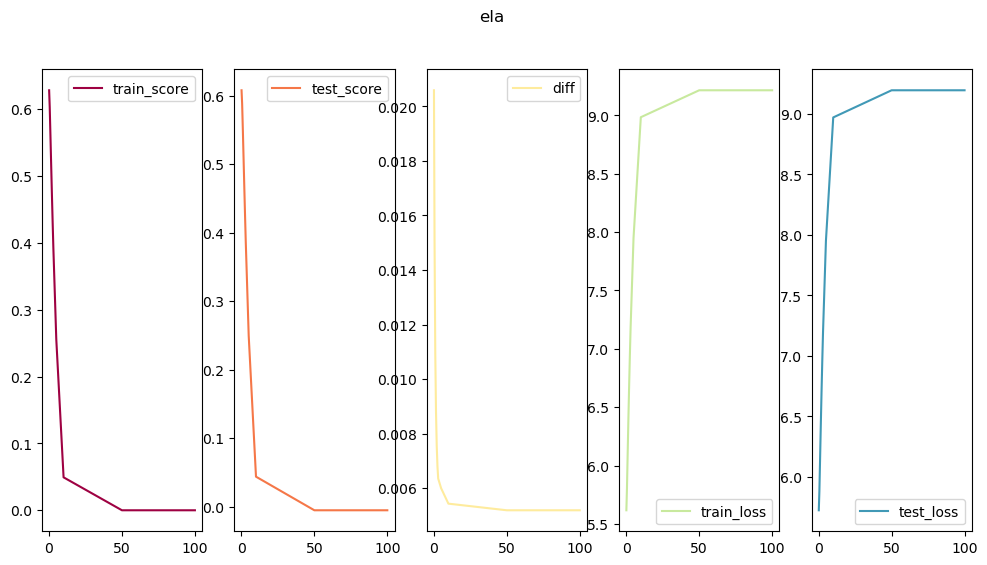

In [68]:
ft_choice(['rm','lstat','ptratio','indus','tax'],'ela')

### 정규화를 하면. 하이퍼 파라미터 알파의 의미가 없어진다.
### 그러면 다항회귀에서 해결하는게? 맞다.
### z 정규화의 결과물이 minmax() 보다 좋은 점수를 보인다.


회귀 계수(coefficient, coef_)는 입력 변수(X)가 출력(Y)에 미치는 영향력을 의미함

alpha 값은 하이퍼파라미터이며, 이 값이 증가하면 규제(패널티)가 강해지기 때문!

alpha 값이 클수록 패널티 증가 → 과적합 방지

기울기(coef_)가 너무 크면 모델이 훈련 데이터에 과도하게 맞춰짐 → 과적합 발생
이를 방지하기 위해 alpha 값을 올려 기울기(coef_)가 너무 커지지 않도록 규제함
릿지 회귀에서는 기울기가 점진적으로 감소 (완전한 0은 아님)

L2 규제(릿지)는 coef_ 값을 점진적으로 작게 만듦
alpha가 커질수록 기울기는 작아지지만, 완전히 0이 되지는 않음
라쏘 회귀에서는 일부 기울기가 완전히 0이 됨

L1 규제(라쏘)는 특정 coef_를 아예 0으로 만들어서 불필요한 변수 제거
즉, alpha 값이 크면 일부 특성은 완전히 제거됨
엘라스틱넷은 둘의 조합이므로 일부 기울기는 감소하고, 일부는 0이 됨